# Loading Data from Source

In [1]:
#Importing basics dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#reading the source file
document = pd.read_csv('C:/Users/Vikas/Downloads/Sample_Assignment_ML.csv', encoding = "latin1")

## Exploring Data

In [3]:
#descibing the dataset
document.describe()

,Week,Date,Survey response date,Product Group,Sub-Product,Channel,Channel Survey,Support Satisfaction,Survey Resolved Bucket,CSat comment text,...,Primary Driver 2,Primary Driver 3,Case Tagged Correctly?,"If Product Tagging Is Incorrect, specify the correct Product",Company XYZ Product/Non - Company XYZ Product,Phone to Email DSAT,Month,TENURE,TENURE GROUP,Device Group
count,988,988,988,988,493,988,988,988,482,132,...,738,325,701,31,74,105,988,491,491,493
unique,3,17,22,4,3,1,2,5,3,128,...,63,70,5,6,42,5,2,4,2,2
top,03-05-2017,03-11-2017,3/13/2017,Buyer Group,Technical Services,PHONE,PHONE,(5) Slightly satisfied,No,Please do not connect me to overseas customer ...,...,Product Performance,Any other product feature causing customer dis...,Yes,Play,mailxyz,SYSTEM TRIGGERED - Call needs to be transferred,March,Tenured,More than 60 Days,Non-ABC_prod
freq,501,110,159,417,388,988,587,329,269,2,...,103,42,609,15,12,53,924,251,343,384


## Charting Trends In Data

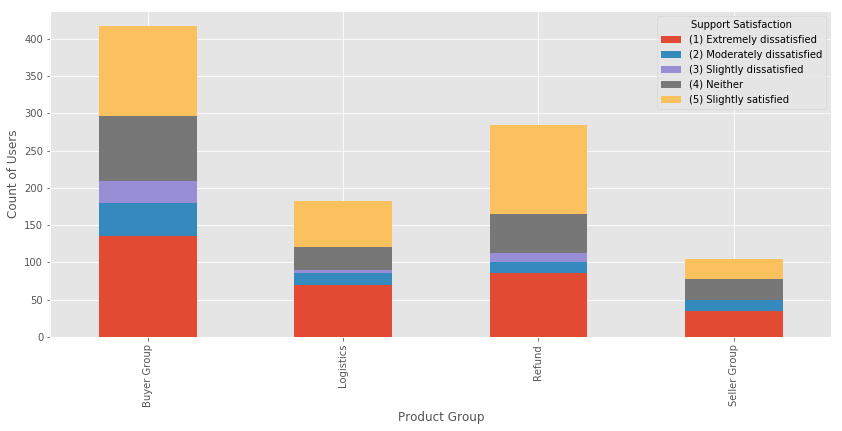

In [4]:
#Plot Product group vs support sat
df1 = document.groupby(['Product Group','Support Satisfaction']).size()
df1.unstack().plot(kind='bar', stacked=True,figsize=(14, 6))
plt.ylabel("Count of Users")

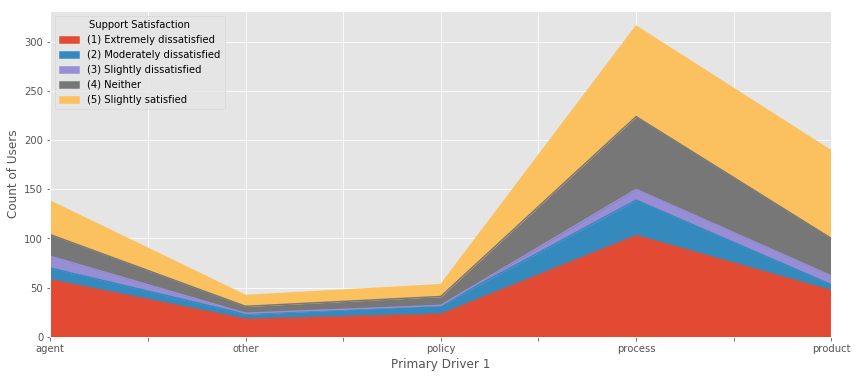

In [5]:
#Area plot for Primary Driver vs Support Satisfaction
df2 = pd.DataFrame(document['Primary Driver 1'].str.lower())
df2['Support Satisfaction']=document['Support Satisfaction']
df2 = df2.groupby(['Primary Driver 1','Support Satisfaction']).size()
df2.unstack().plot(kind='area', stacked=True,figsize=(14, 6))
plt.ylabel("Count of Users")

## Wordcloud For Key Topics

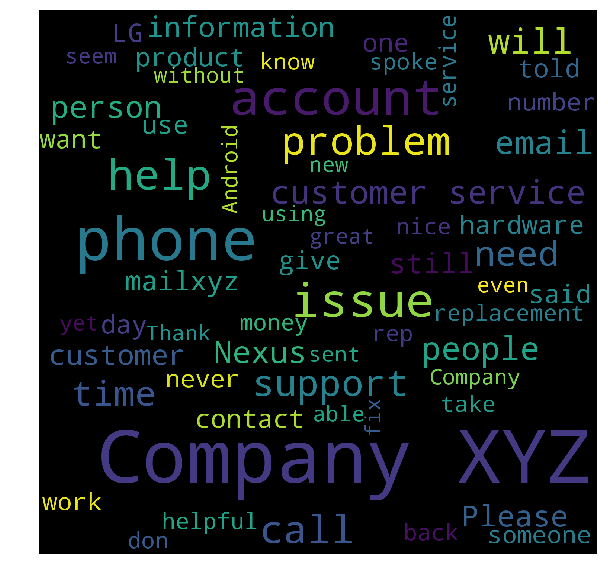

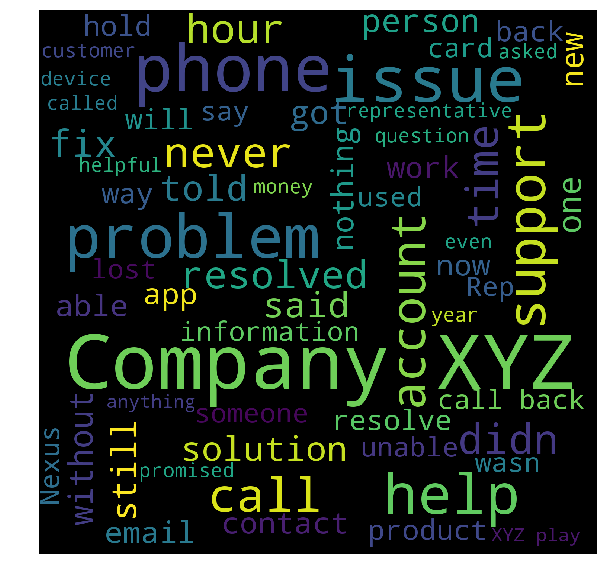

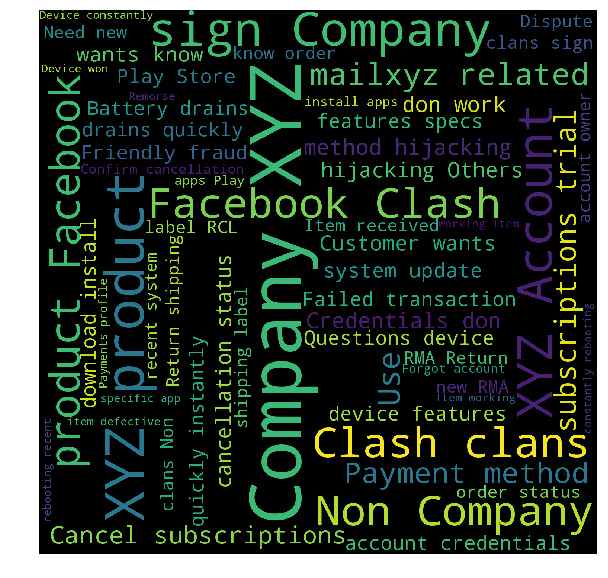

In [6]:
#Creating WordCloud
import re
from wordcloud import WordCloud, STOPWORDS
wc = document

for i in ['CSat comment text','CSat dissatisfied text','Issue Description']:
    WordC = ' '.join(wc[i].dropna().astype(str).values)
    review_text = re.sub("[^a-zA-Z]"," ", WordC)
    wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      max_words=60,
                      width=1500,
                      height=1500
                     ).generate(review_text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud,aspect='auto')
    plt.axis('off')
    #plt.savefig('./Csat.png', dpi=300) #to save the plot
    plt.show()
    

## Charting Word Freq

Plot: CSat comment text


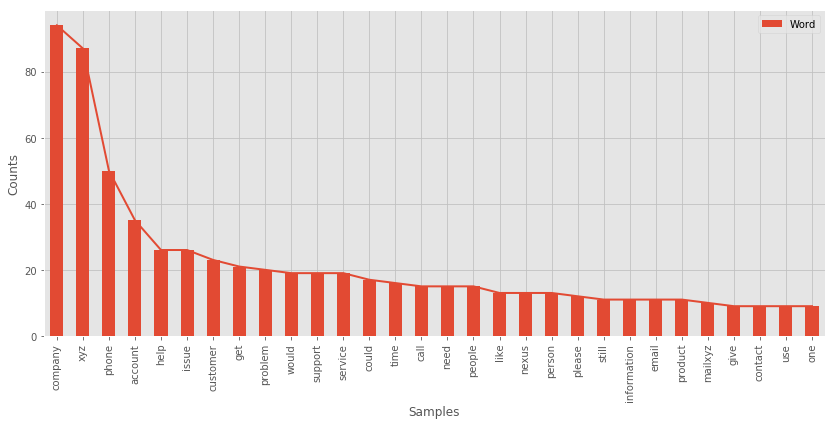

Plot: CSat dissatisfied text


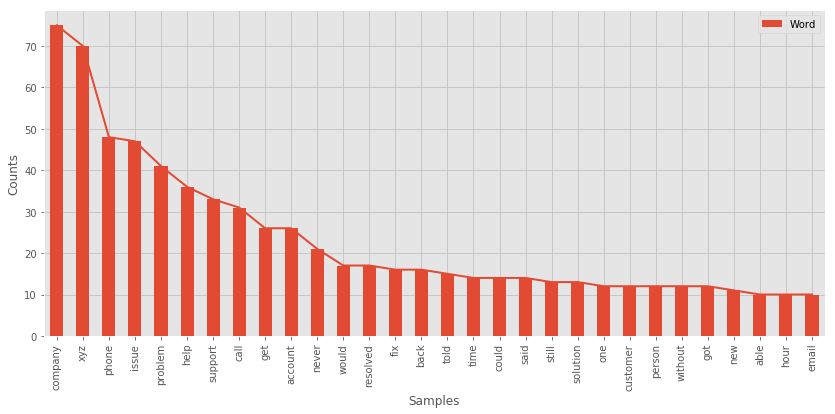

Plot: Issue Description


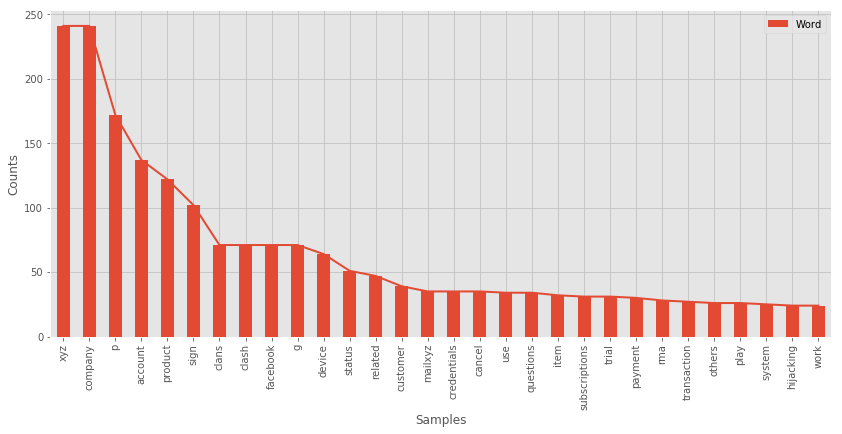

In [7]:
import re
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words())

#Stripping Words from multiple columns to single string
#WordC1 = ' '.join(wc['CSat comment text'].dropna().astype(str).values)
#WordC2 = ' '.join(wc['CSat dissatisfied text'].dropna().astype(str).values)
#WordC3 = ' '.join(wc['Issue Description'].dropna().astype(str).values)
#WordC1 = ' '.join(wc['Reviewer\'s Comments'].dropna().astype(str).values)
#
#fdist1 = nltk.FreqDist(i for i in word.lower().split() if i not in stop)
#fredi= pd.DataFrame(fdist1.most_common(30), columns={"Word","Count"})
#fredi.plot(kind='bar',figsize=(14, 6))
#fdist1.plot(30,)
#Data pre-processing
for i in ['CSat comment text','CSat dissatisfied text','Issue Description']:
    word = ' '.join(wc[i].dropna().astype(str).values)
    review_text = re.sub("[^a-zA-Z]"," ", word)
    fdist1 = nltk.FreqDist(i for i in review_text.lower().split() if i not in stop)
    fredi= pd.DataFrame(fdist1.most_common(30), columns={"Word","Count"})
    print('Plot:',i)
    fredi.plot(kind='bar',figsize=(14, 6))
    fdist1.plot(30)

Product Group   Sub-Product        Support Satisfaction       
Buyer Group    Technical Services  (1) Extremely dissatisfied     124
                                   (2) Moderately dissatisfied     36
                                   (3) Slightly dissatisfied       29
                                   (4) Neither                     84
                                   (5) Slightly satisfied         115
Seller Group   Order Management    (1) Extremely dissatisfied      34
                                   (2) Moderately dissatisfied     15
                                   (3) Slightly dissatisfied        1
                                   (4) Neither                     27
                                   (5) Slightly satisfied          27
               Pre Sales           (4) Neither                      1
dtype: int64


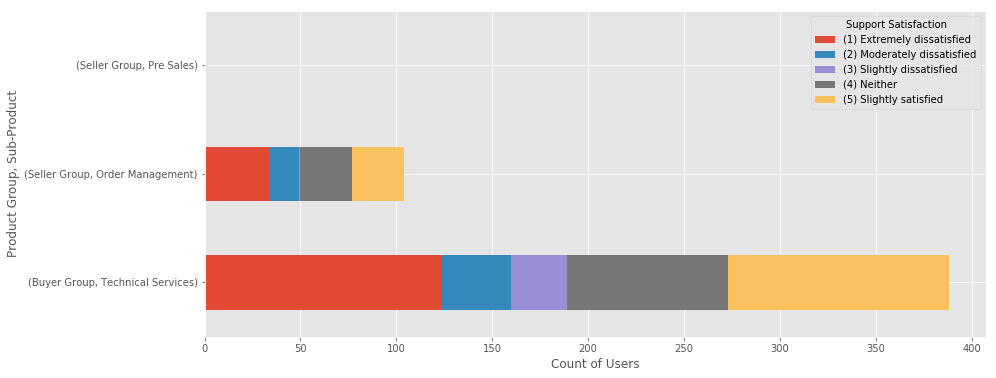

In [8]:
#BarH plot for Subgroup with Satisfaction
df4 = document.groupby(['Product Group',' Sub-Product','Support Satisfaction']).size()
print(df4)
df4.unstack().plot(kind='barh', stacked=True,figsize=(14, 6))
plt.xlabel("Count of Users")

## Feature Extraction

#### Extract Resolution Offered from Reviewer Comment

In [9]:
#Extracting using Regex from Reviewer's comment to get additional features
df5=document['Reviewer\'s Comments']
for j in range(2):
    if j==0:
        for i in ['Resolution Offered:(.*)','Resolution:(.*)','provided:(.*)','resolution:(.*)']:
            df6=df5.str.extract(i)
    else:
        for i in ['Resolution Offered:(.*)','Resolution:(.*)','provided:(.*)','resolution:(.*)']:
            df6=df6.append(df5.str.extract(i))

print(df6.unique().size)

674


C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


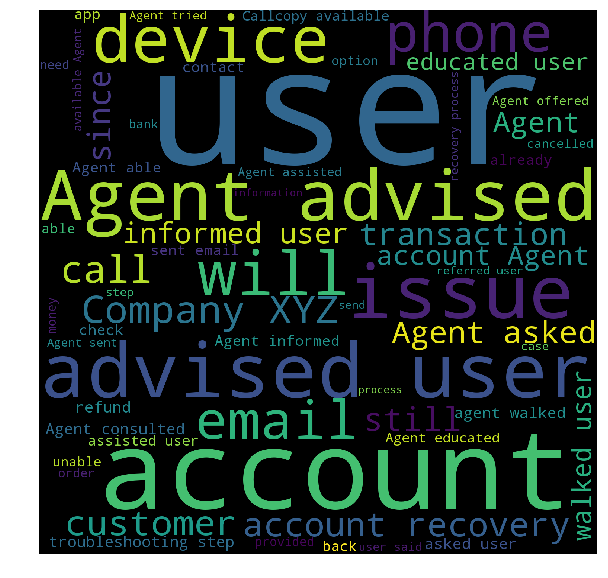

In [10]:
#WordCloud
WordC1= ' '.join(df6.dropna().astype(str).values)
review_text1 = re.sub("[^a-zA-Z]"," ", WordC1)
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      max_words=60,
                      width=1500,
                      height=1500
                     ).generate(review_text1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,aspect='auto')
plt.axis('off')
#plt.savefig('./Csat.png', dpi=300) #to save the plot
plt.show()


In [11]:
#Creating Frequency Table
fdist2 = nltk.FreqDist(i for i in review_text1.lower().split() if i not in stop)
print("Top 30 Words with there Frequency:")
pd.DataFrame(fdist2.most_common(30),columns={"Word", "Frequency"})

Top 30 Words with there Frequency:


,Frequency,Word
0,user,968
1,agent,900
2,account,293
3,advised,236
4,email,192
5,device,133
6,issue,130
7,call,123
8,phone,122
9,customer,112


#### Extract Cause of Dissatisfaction from Reviewer Comment

In [12]:
#Extracting using Regex from Reviewer's comment to get additional features
for j in range(2):
    if j==0:
        for i in ['DSAT:(.*)','dsat:(.*)','Dsat:(.*)']:
            df7=df5.str.extract(i)
    else:
        for i in ['DSAT:(.*)','dsat:(.*)','Dsat:(.*)']:
            df7=df7.append(df5.str.extract(i))

print(df7.unique().size)

660


C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


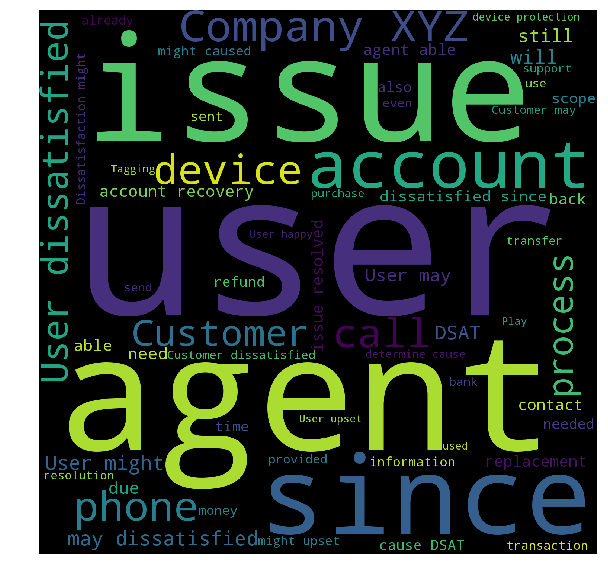

Top 30 Words with there Frequency:


,Frequency,Word
0,user,629
1,agent,331
2,issue,198
3,dissatisfied,184
4,account,180
5,since,160
6,customer,145
7,dsat,134
8,phone,120
9,device,116


In [13]:
WordC2= ' '.join(df7.dropna().astype(str).values)
review_text2 = re.sub("[^a-zA-Z]"," ", WordC2)
wordcloud = WordCloud(
                      #font_path='/Users/sebastian/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      max_words=60,
                      width=1500,
                      height=1500
                     ).generate(review_text2)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,aspect='auto')
plt.axis('off')
#plt.savefig('./Csat.png', dpi=300) #to save the plot
plt.show()

fdist3 = nltk.FreqDist(i for i in review_text2.lower().split() if i not in stop)
print("Top 30 Words with there Frequency:")
pd.DataFrame(fdist3.most_common(30),columns={"Word", "Frequency"})

#  

# Machine Learning to Classify Comments & Sentiment Analysis

In [14]:
#Loading User Comments & preprocessing
comments = pd.DataFrame(document[["CSat comment text","CSat dissatisfied text","Issue Description","Support Satisfaction"]].copy())
comments=comments.fillna("");

In [15]:
#Collecting User Verbatim,comment & issue description into one
comments["User Comment"] = comments["CSat comment text"].astype(str) + comments["CSat dissatisfied text"].astype(str)+ comments["Issue Description"].astype(str)
comments.drop([col for col in ["CSat comment text","CSat dissatisfied text","Issue Description"] if col in comments], 
        axis=1, inplace=True)

### Add Satisfaction Category Column

In [16]:
#Creating Categories in Support Satistfaction as Positive, Negative & Neutral
comments["Satisfaction Category"] = comments["Support Satisfaction"].apply(lambda cat: "positive" if cat == "(5) Slightly satisfied" else "neutral" if cat=="(4) Neither" else "negative")

In [17]:
#Viewing head 5 records
comments.head()

,Support Satisfaction,User Comment,Satisfaction Category
0,(1) Extremely dissatisfied,The signal on the ABC_prod is broken and it ha...,negative
1,(4) Neither,Caller can't hear me,neutral
2,(5) Slightly satisfied,Other Company XYZ product,positive
3,(4) Neither,"Non-Company XYZ product (e.g. Facebook, Clash ...",neutral
4,(1) Extremely dissatisfied,Cant sign in to Company XYZ Account,negative


In [18]:
#Filtering data for NaN's
filter = comments["User Comment"] != ""
comments = comments[filter]
del comments['Support Satisfaction']
#comments
#comments[comments["User Comment"] == ""].count

In [19]:
#Importing Scikit-Learn dependencies & Models
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [20]:
#Creating Functions for data Cleaning & Validation, plotting Confusion MAtrix
def comments_to_wordlist( review, remove_stopwords=True ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    # 1. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    # 2. Convert words to lower case and split them
    words = review_text.lower().split()
    # 3. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))
    # 4. Return a list of words
    return(words)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(3)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis("on")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
#Train Test split of 80:20
train, test = train_test_split(comments, test_size = 0.2)

In [22]:
#Cleaning training data
clean_train_comments = []
for comm in train['User Comment']:
    clean_train_comments.append( " ".join(comments_to_wordlist(comm)))

#Cleaning testing data    
clean_test_comments = []
for comm in test['User Comment']:
    clean_test_comments.append( " ".join(comments_to_wordlist(comm)))

In [23]:
#Initailizing Tfidf & vectorizing the features for ML model
vectorizer = TfidfVectorizer( min_df=1, max_df=0.95, max_features = 200000, ngram_range = ( 1, 4 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_comments)
train_features = vectorizer.transform(clean_train_comments)

test_features = vectorizer.transform(clean_test_comments)
fselect = SelectKBest(chi2 )
#y_train =train["Satisfaction Category"]
#y_train.astype(int)
train_features = fselect.fit_transform(train_features, train["Satisfaction Category"])
test_features = fselect.transform(test_features)

## Building Classifiers

In [24]:
#Creating Multiple classifiers for training data
classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('MultinomialNB', MultinomialNB(alpha=0.001)),
               ('SGDClassifier', SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)),
               ('GradientBoostingClassifier', GradientBoostingClassifier()),
              ]
allscores = []

#Looping over classifier to fit, predict accuracy & create confusion matrix
for name, classifier in classifiers:
    scores = []
    for i in range(1): # of runs
        print (name)

        classifier.fit( train_features, train["Satisfaction Category"] )
        pred = classifier.predict( test_features.toarray() )
        cnf_matrix = confusion_matrix(test["Satisfaction Category"], pred,)
        print(cnf_matrix)
        #plot_confusion_matrix(cnf_matrix, classes=['Neg','Neutral','Pos'],
        #              title='Confusion matrix, with normalization', normalize=True)

RandomForestClassifierG
[[80  1  4]
 [28  1  2]
 [54  0 10]]
RandomForestClassifierE
[[80  1  4]
 [28  1  2]
 [54  0 10]]
AdaBoostClassifier
[[80  3  2]
 [28  2  1]
 [54  2  8]]
ExtraTreesClassifier
[[80  1  4]
 [28  1  2]
 [54  0 10]]
DecisionTreeClassifier
[[80  1  4]
 [28  1  2]
 [54  0 10]]
LogisticRegression
[[81  0  4]
 [29  0  2]
 [54  0 10]]
MultinomialNB
[[81  2  2]
 [30  1  0]
 [59  2  3]]
SGDClassifier
[[79  3  3]
 [29  1  1]
 [59  2  3]]
GradientBoostingClassifier
[[80  1  4]
 [28  1  2]
 [54  0 10]]


## Classification for Reviewer Comments

In [25]:
#Mapping Support Satisfaction Positive, Negative & Neutral
def partition(x):
    if x == "(5) Slightly satisfied":
        return "positive"
    elif x== "(4) Neither":
        return "neutral"
    return "negative"
df8=pd.DataFrame(document[['Reviewer\'s Comments',"Support Satisfaction"]].copy())
#for i in ['Resolution Offered:(.*)','Resolution:(.*)','provided:(.*)','resolution:(.*)']:
#    df6=df6.append(df5.str.extract(i))
#    
#print(df6.unique().size)
df8 = df8[pd.notnull(df8['Reviewer\'s Comments'])]
df8 = df8[pd.notnull(df8['Support Satisfaction'])]
#print(df8)
df8["Support Satisfaction"] = df8['Support Satisfaction'].map(partition)

comment= df8['Reviewer\'s Comments']
satisfaction = df8["Support Satisfaction"]

In [26]:
#Train test split of 80:20
X_train, X_test, y_train, y_test = train_test_split(comment, satisfaction, test_size=0.2, random_state=42)

#### Proper format our data and build the Ttidf matrix:

###### o Tokenization
###### o Stop words removal
###### o Lowering
###### o Pruning (numbers and punctuation)
###### o Stemming

In [27]:
#Import tfidf, stemmer,stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import string
stemmer = PorterStemmer()
from nltk.corpus import stopwords

#stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#tokenizing
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

#handling punctuaions
intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

#--- Training set

#creating BOW model
corpus = []
for text in X_train:
    #print(text)
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)
        
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
        
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#--- Test set pre processing

test_set = []
for text in X_test:
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

X_new_counts = count_vect.transform(test_set)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


#Before & After data cleaning & processing
df9 = DataFrame({'Before': X_train, 'After': corpus})
print(df9.head(20))

prediction = dict()

                                                 After  \
333  custom concern issu resolut offer caus dsat us...   
364  custom concern issu resolut offer caus dsat us...   
763  custom concern issu resolut offer caus dsat in...   
921  custom concern issu abc prod xl batteri die ch...   
308  custom concern issu call record reli agent not...   
624  http callcopi corp compani xyz com mediaplay e...   
80   custom concern issu user want know compani xyz...   
150  custom concern issu abc prod connect wifi netw...   
432  user issu user call remov payment method accou...   
656  issu custom call charg awar resolut agent tri ...   
928  custom concern issu nexu 6p said batteri drain...   
693  user issu resolut offer caus dsat custom verba...   
384  custom concern issu resolut offer caus dsat us...   
329  custom concern issu resolut offer caus dsat us...   
641  issu custom alreadi monthli subscript want cha...   
135  call record base case custom concern issu got ...   
760  user issu

In [28]:
#Creating models to train on
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

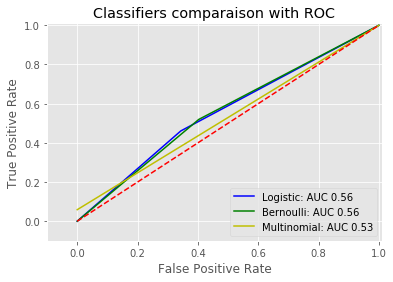

In [29]:
#Plot roc curve for finding AUC & Confusion matrix of classifier
from sklearn.metrics import roc_curve, auc
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt),vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.01])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

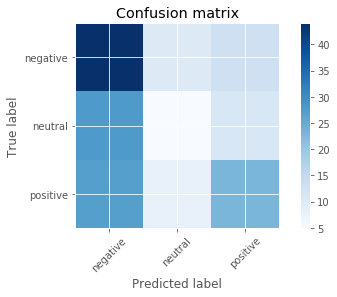

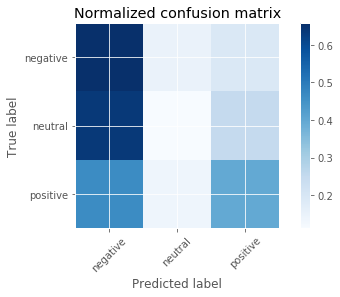

In [30]:
#Creating Confusion & Normalizing it
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(satisfaction)))
    plt.xticks(tick_marks, set(satisfaction), rotation=45)
    plt.yticks(tick_marks, set(satisfaction))
    plt.tight_layout()
    plt.axis("on")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

# Sentiment Analysis Using NLTK

In [31]:
#Sentiment Analysis using NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
text_sent =comments["User Comment"]
sentiment = SentimentIntensityAnalyzer()

C:\Anaconda3\envs\tensorflow\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [32]:
#Subsetting small portion to do analysis
sub_text_sent =text_sent.sample(frac=.04)

In [33]:
#looping of sentences & printing the sentiments
for sentences in sub_text_sent:
    ss = sentiment.polarity_scores(sentences)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(sentences)   

compound: -0.4019, 
neg: 0.124, 
neu: 0.876, 
pos: 0.0, 
Still waiting to be contacted about my G-Suite password problem for the @mummamoon.com emails that I set upOther Company XYZ product
compound: 0.1756, 
neg: 0.076, 
neu: 0.855, 
pos: 0.068, 
Carlos...the secind person i spoke witb is a great representative he was very helpfulMy issue has not been resolved i have had no communication since saturday regarding the issue but you have time to send a surveyP2P cancellation status
compound: 0.4404, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 
Gift card not activated
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Device crashed
compound: -0.7432, 
neg: 0.136, 
neu: 0.822, 
pos: 0.042, 
Why did Company XYZ sell Company XYZ-Nexus phones when Company XYZ does not stand behind the product and Huawei is an organization not honoring their warranty after delivering a product with a defect that renders the device useless after less than 8 months of use. To be honest, what one thinks of Apple, they st

## Using Textblob

In [34]:
#Using Textblob & Pattern Analyzer, NaiveBayes Analyzer for sentiment analysis
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
#sentiment prediction for a sample comment from dataset:
blob = TextBlob("If people keep using 2 step verification on their computers Company XYZ will go out of business if they don't fix the issue.Can't login no strong tech support.mailxyz related")
blob.sentiment

Sentiment(polarity=-0.10833333333333332, subjectivity=0.5666666666666667)

# =============================================================